## Proyecto Integral

In [ ]:
#Importamos los datos
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as st

In [ ]:
#Leemos los datos
games_data = pd.read_csv("datasets/games.csv")

<h3><b>Preparación de los datos</b></h3>

In [3]:
#Revisamos la información general de nuestros datos
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Impresión rápida de nuestros datos para analizar el contenido
games_data.sample(8)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16451,Ishin Renka: Ryouma Gaiden,PSP,2010.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
2987,FIFA Soccer 06,XB,2005.0,Sports,0.29,0.38,0.00,0.01,80.0,7.5,E
9381,History Civil War: Secret Missions,X360,2008.0,Shooter,0.12,0.00,0.00,0.01,NaN,NaN,NaN
11685,Salon Superstar,DS,2009.0,Simulation,0.07,0.00,0.00,0.00,NaN,tbd,E
12243,Carol Vorderman's Sudoku,PSP,2006.0,Puzzle,0.05,0.00,0.00,0.01,72.0,tbd,E
3717,Hotel Dusk: Room 215,DS,2007.0,Adventure,0.26,0.04,0.22,0.03,78.0,8.6,T
14607,Hakuouki,PS2,2008.0,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN
3813,Return to Castle Wolfenstein: Operation Resurr...,PS2,2003.0,Shooter,0.26,0.20,0.00,0.07,66.0,8,M


In [5]:
#Corregimos los nombres de nuestras columnas a minúsculas
games_data.columns = games_data.columns.str.lower()
#Confirmamos que se encuentren corregidas
games_data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
#Revisamos los valores vacíos
games_data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

<h5><b>Conclusión sobre la vista general de los datos y las acciones tomadas</b></h5>
Al revisar el conjunto de datos, decidimos realizar algunas modificaciones iniciales para facilitar el análisis y mejorar la organización:

Se renombraron las columnas a minúsculas para mantener uniformidad y facilitar su manipulación.

A continuación, se describen las principales acciones realizadas en columnas específicas:

<h6><b>name:</b></h6> - Se detectaron algunos valores vacíos, por lo que se reemplazaron por 'Unknown' para evitar nulos y facilitar su identificación durante el análisis. 
<h6><b>year_of_release:</b></h6> - Optamos por <b>conservar los valores vacíos</b>, ya que es una información crítica y reemplazarla podría distorsionar análisis posteriores, especialmente los relacionados con tendencias temporales. 
<h6><b>genre:</b></h6> - Al igual que con la columna 'name', se reemplazaron los valores ausentes con 'Unknown' para mantener la consistencia y evitar registros nulos. 
<h6><b>critic_score:</b></h6> - Esta columna contiene una gran cantidad de valores ausentes (aproximadamente la mitad del total). Inicialmente se consideró reemplazarlos con cero, pero se descartó esta opción ya que <b>podría distorsionar medidas estadísticas</b> como promedio o mediana. 
- También se evaluó rellenar con el promedio por nombre del juego, pero se descartó debido a posibles diferencias entre plataformas (gráficos, rendimiento, etc.) que podrían influir en las calificaciones. Finalmente, se optó por mantener los valores nulos. 
<h6><b>user_score:</b></h6> - Presenta una situación similar a 'critic_score', pero con el agregado de valores 'tbd' (to be determined), lo que convierte su tipo en 'object'. 
- Se decidió convertir la columna a tipo 'float', reemplazando 'tbd' por 'NaN', ya que esos valores representan datos aún no evaluados y <b>no deberían considerarse como puntuaciones válidas</b>. 
- También se consideró imputar con promedios por juego, pero se descartó por las mismas razones que en 'critic_score'. 
<h6><b>rating:</b></h6> - Se reemplazaron los valores vacíos con 'Unknown' para mantener la coherencia del conjunto de datos y evitar errores durante el análisis.

In [8]:
#Correcciones valores vacios y tipo de datos.
#Name
games_data['name'].fillna('Unknown',inplace = True) #Asignamos unknown para eliminar el valor vacío.
#Year of release

#Genre
games_data['genre'].fillna('Unknown',inplace = True) #Asignamos unknown para eliminar el valor vacío.

#Critic score
#Buscamos reducir un poco los valores vacíos promediando en base al nombre, aplica solo en el caso de los que tienen nombre repetido es decir que el mismo juego tiene más de unas versión
#games_data['critic_score'] = games_data['critic_score'].fillna(games_data.groupby('name')['critic_score'].transform('mean')) 

#User score 
games_data['user_score'] = games_data['user_score'].replace('tbd', np.nan)
games_data['user_score'] = games_data['user_score'].astype(float)
#games_data['user_score'] = games_data['user_score'].fillna(games_data.groupby('name')['user_score'].transform('mean'))

#Rating
games_data['rating'].fillna('Unknown',inplace = True) #Asignamos unknown para eliminar el valor vacío.
#games_data['rating'] = games_data['rating'].fillna(games_data['rating'].value_counts().idxmax())

games_data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
dtype: int64

In [9]:
#Confirmamos de forma general nuestros datos
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [10]:
#Revisamos si tenemos datos duplicados
duplicates = games_data.duplicated().sum()
print('Valores duplicados: ',duplicates)

Valores duplicados:  0


In [11]:
#Corregimos los valores duplicados 



In [12]:
#Revisamos los datos númericos generales
games_data.describe()



,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165,1.500006
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


Podemos observar de forma general la distribución de nuestros estádisticos númericos.

In [ ]:
#Sumamos los totales de cada región y los asignamos a una nueva columna total_sales
games_data['total_sales'] =  games_data['na_sales']+games_data['eu_sales']+games_data['jp_sales']+games_data['other_sales']



<h3><b>Análisis de los datos</b></h3>

In [14]:
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


In [15]:
#Revisamos la cantidad de juegos lanzados por años
group_year = games_data.groupby(['year_of_release'])
group_year = group_year.agg(count_games=('name','count'),sales_total=('total_sales','sum'))
group_year = group_year.reset_index()
group_year

,year_of_release,count_games,sales_total
0,1980.0,9,11.38
1,1981.0,46,35.68
2,1982.0,36,28.88
3,1983.0,17,16.80
4,1984.0,14,50.35
5,1985.0,14,53.95
6,1986.0,21,37.08
7,1987.0,16,21.70
8,1988.0,15,47.21
9,1989.0,17,73.45


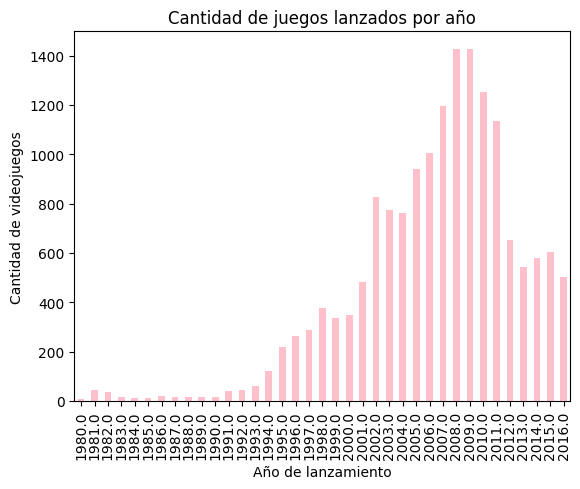

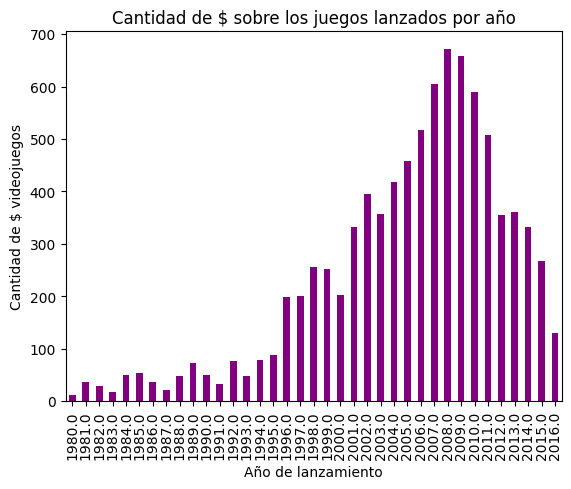

In [16]:
group_year.plot(kind='bar', 
                x ='year_of_release', 
                y='count_games', 
                color='pink', 
                title='Cantidad de juegos lanzados por año',
                legend = False,
                xlabel = 'Año de lanzamiento',
                ylabel = 'Cantidad de videojuegos'
               )
plt.show()

group_year.plot(kind='bar', 
                x ='year_of_release', 
                y='sales_total', 
                color='purple', 
                title='Cantidad de $ sobre los juegos lanzados por año',
                legend = False,
                xlabel = 'Año de lanzamiento',
                ylabel = 'Cantidad de $ videojuegos'
               )
plt.show()

<h5><b>Observaciones:</b></h5> 

Podemos observar grandes variaciones tanto en la cantidad de juegos lanzados como en las ventas generadas por esos títulos. En ambos casos, la distribución está sesgada a la izquierda, con un pico marcado entre los años 2008 y 2009, periodo que representa el mayor número de lanzamientos y ventas.

La forma general de la distribución se asemeja a una curva normal, con un aumento progresivo antes del pico y un descenso posterior, lo que sugiere un ciclo natural en la industria de los videojuegos durante esos años.

In [17]:
#Revisamos las ventas por plataforma
group_platform = games_data.groupby(['platform'])
group_platform = group_platform.agg(count_games=('name','count'),sales_total=('total_sales','sum'))
group_platform = group_platform.reset_index()
group_platform = group_platform.sort_values(by='sales_total',ascending=False).head()
group_platform

,platform,count_games,sales_total
16,PS2,2161,1255.77
28,X360,1262,971.42
17,PS3,1331,939.65
26,Wii,1320,907.51
4,DS,2151,806.12


In [18]:
#Agrupamos las ventas por plataforma y año de las 5 plataformas con mayores ventas registradas
group_platform_year = games_data.groupby(['platform','year_of_release'])
group_platform_year = group_platform_year.agg(count_games=('name','count'),sales_total=('total_sales','sum'))
group_platform_year = group_platform_year.reset_index()
#group_platform_year.sort_values(by='sales_total',ascending=False)


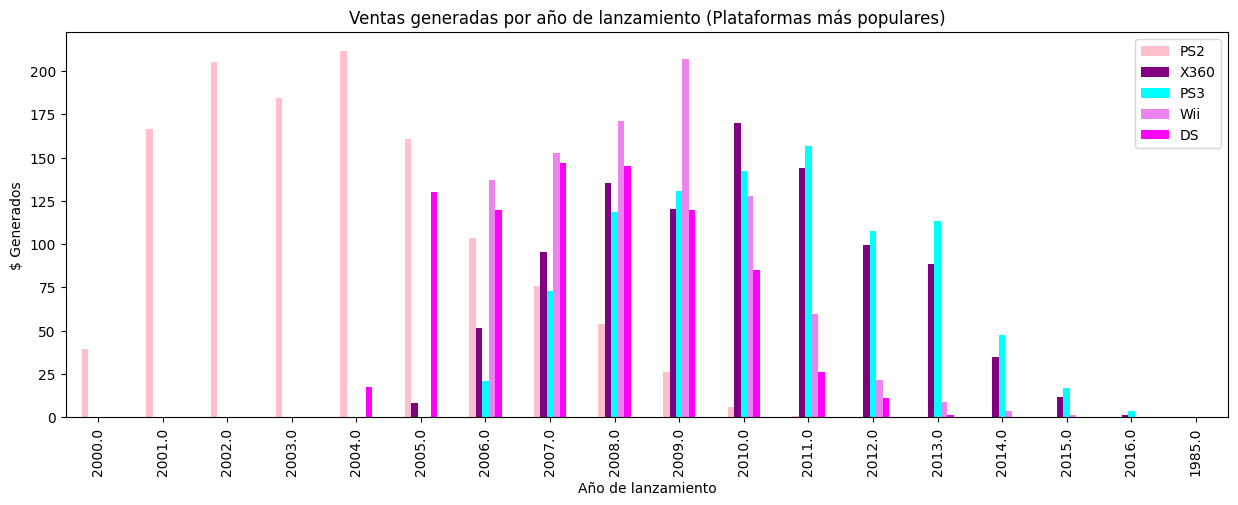

In [19]:
# ****** Agrupamos cada venta generada por cada uno de los videojuegos más vendidos
# PS2_game ******
PS2_game = group_platform_year[group_platform_year['platform'] == 'PS2'].groupby(['platform','year_of_release'])
PS2_game = PS2_game.agg(sum_ps2_sales=('sales_total','sum'))
PS2_game = PS2_game.reset_index()

# X360_game ******
X360_game = group_platform_year[group_platform_year['platform'] == 'X360'].groupby(['platform','year_of_release'])
X360_game = X360_game.agg(sum_360_sales=('sales_total','sum'))
X360_game = X360_game.reset_index()

# PS3_game ******
PS3_game = group_platform_year[group_platform_year['platform'] == 'PS3'].groupby(['platform','year_of_release'])
PS3_game = PS3_game.agg(sum_PS3_sales=('sales_total','sum'))
PS3_game = PS3_game.reset_index()

# Wii_game ******
Wii_game = group_platform_year[group_platform_year['platform'] == 'Wii'].groupby(['platform','year_of_release'])
Wii_game = Wii_game.agg(sum_Wii_sales=('sales_total','sum'))
Wii_game = Wii_game.reset_index()

# DS_game ******
DS_game = group_platform_year[group_platform_year['platform'] == 'DS'].groupby(['platform','year_of_release'])
DS_game = DS_game.agg(sum_DS_sales=('sales_total','sum'))
DS_game = DS_game.reset_index()

# ****** Unimos todos los datos de los videojuegos en una sola tabla para realizar nuestro gráfico.
df_combined = pd.merge(PS2_game[['year_of_release','sum_ps2_sales']], 
                       X360_game[['year_of_release','sum_360_sales']], 
                       on='year_of_release',
                       how="outer"
                      )

df_combined = pd.merge(df_combined, 
                       PS3_game[['year_of_release','sum_PS3_sales']], 
                       on='year_of_release',
                       how="outer") 

df_combined = pd.merge(df_combined, 
                       Wii_game[['year_of_release','sum_Wii_sales']], 
                       on='year_of_release',
                       how="outer") 

df_combined = pd.merge(df_combined, 
                       DS_game[['year_of_release','sum_DS_sales']], 
                       on='year_of_release',
                       how="outer") 
#print(df_combined)
#Generamos el gráfico
df_combined.plot(kind='bar', 
                 x ='year_of_release', 
                 color=['pink','purple','cyan','violet','magenta'], 
                 title='Ventas generadas por año de lanzamiento (Plataformas más populares)',
                 figsize =[15,5],
                 xlabel = 'Año de lanzamiento',
                 ylabel = '$ Generados')
plt.legend(['PS2','X360','PS3','Wii','DS'])
plt.show()

<h5><b>Observaciones:</b></h5>
Seleccionamos las cinco plataformas con mayores ventas registradas (PS2, X360, PS3, Wii y DS) y analizamos su comportamiento a lo largo del tiempo. En el gráfico, se observa que tras su lanzamiento, las ventas aumentan progresivamente, siguiendo una curva similar a una distribución normal. Este patrón se repite en casi todas las plataformas, con un punto máximo seguido por una disminución que suele suceder entre el septimo y noveno año, lo que marca el declive de cada consola.

Destaca el caso de la PS2, que fue durante varios años la plataforma líder en ventas, en un periodo donde no enfrentó una competencia directa en volumen. En cambio, las otras consolas coincidieron en el tiempo, compitiendo entre sí en una misma generación. También se observa que, hacia 2016, el ciclo de ventas para todas estas plataformas ha llegado prácticamente a su fin, por lo que es poco probable que alguna siga siendo relevante en los años posteriores.

In [20]:
#Creamos un dataframe del principal filtrando solamente los datos del periodo de tiempo que nos interesa analizar
#He considerado seleccionar un periodo de tiempo del 2007 al 2016
filter_games = games_data[games_data['year_of_release'] > 2006]
#filter_games.info()


In [21]:
group_filter = filter_games.groupby(['platform'])
group_filter = group_filter.agg(count_games=('name','count'),
                                sales_total=('total_sales','sum'),
                                mean_total=('total_sales','mean'))
group_filter = group_filter.reset_index()
group_filter = group_filter.sort_values(by='sales_total',ascending=False)
group_filter

,platform,count_games,sales_total,mean_total
7,PS3,1279,910.38,0.711790
13,X360,1121,901.37,0.804077
11,Wii,1242,754.03,0.607110
2,DS,1778,535.54,0.301204
8,PS4,392,314.14,0.801378
0,3DS,512,257.81,0.503535
9,PSP,894,183.31,0.205045
6,PS2,546,162.38,0.297399
5,PC,724,160.57,0.221782
15,XOne,247,159.32,0.645020


In [22]:
#group_filter[['mean_total','platform']].plot(kind='hist',bins = 20)

<AxesSubplot:xlabel='mean_total'>

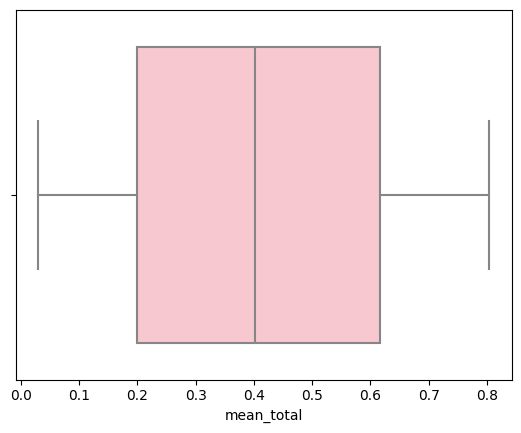

In [23]:
#Diagrama de caja general de las ventas 
sns.boxplot(group_filter['mean_total'], color='pink')


<h5><b>Observaciones:</b></h5>
Analizando el diagrama de caja, observamos que no hay valores atípicos o fuera del rango, lo que indica que las ventas promedio entre las plataformas son relativamente similares y están dentro de un rango consistente. La mediana de la distribución se encuentra aproximadamente en los 0.4 millones de dólares.

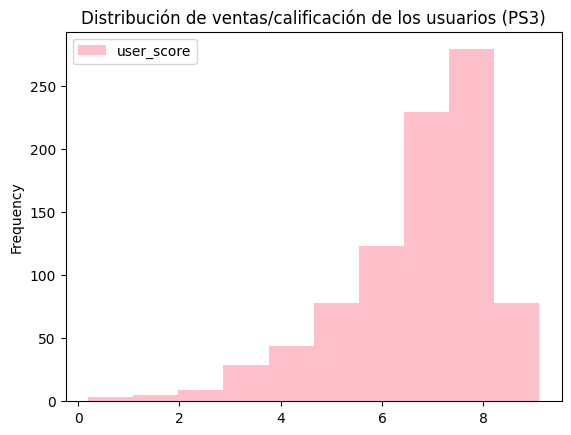

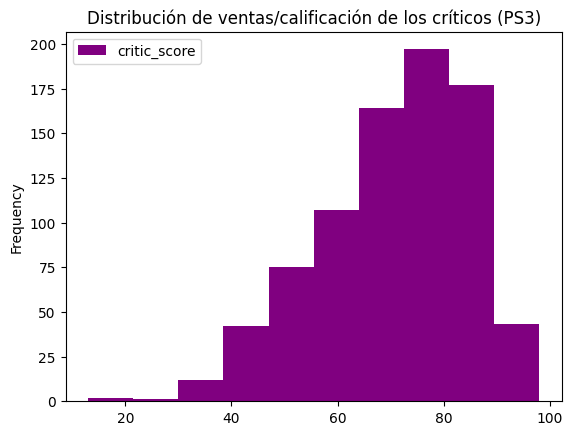

In [ ]:
#Reseñas de los usuarios
data_ps3 = games_data[games_data['platform'] == 'PS3']
data_ps3.sort_values(by='name',ascending=False)
#print(games_data[games_data['platform'] == 'PS3'].mean())
data_ps3.plot(kind='hist',
                x='total_sales', 
                y='critic_score', 
                color='pink', 
                title='Distribución de ventas/calificación de los usuarios (PS3)',
                xlabel = 'Califiación',
                ylabel = 'Ventas generadas'
               )
plt.show()

data_ps3.plot(kind='hist', 
                x='total_sales', 
                y='critic_score',
                color='purple', 
                title='Distribución de ventas/calificación de los críticos (PS3)',
                xlabel = 'Califiación',
                ylabel = 'Ventas generadas'
               )
plt.show()

<h5><b>Observaciones:</b></h5>

Seleccionamos la plataforma PS3 para analizar cómo podrían influir las reseñas de usuarios y críticos en las ventas de los juegos. Al observar ambas distribuciones, notamos que están sesgadas hacia la izquierda, lo que sugiere que a mayor puntuación, mayores son las ventas generadas.

En la distribución basada en las calificaciones de los usuarios (rango de 0 a 10), el pico de ventas se encuentra en los juegos con puntuaciones entre 7 y 8. Por otro lado, en el análisis basado en las reseñas de críticos (rango de 0 a 100), los juegos con mejores ventas tienden a tener puntuaciones alrededor de 80.

Esto podría confirmar que recibir buenas reseñas, tanto de usuarios como de críticos, puede tener un impacto positivo en las ventas de los juegos en esta plataforma.


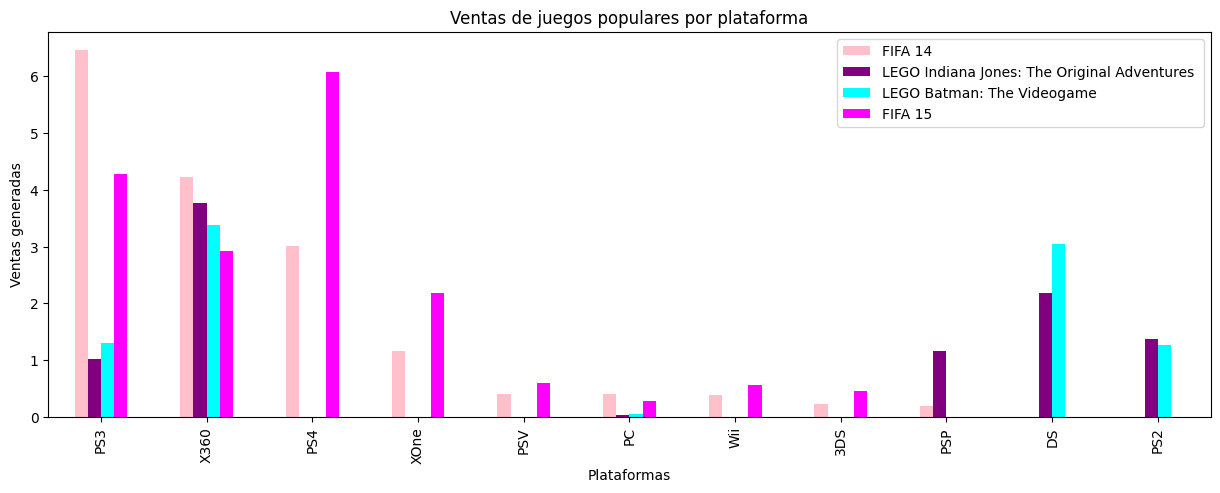

In [ ]:
group_names_games = filter_games.groupby(['name'])
group_names_games = group_names_games.agg(count_games=('platform','count'),sum_games=('total_sales','sum'))
group_names_games = group_names_games.reset_index()
#print(group_names_games.sort_values(by='count_games',ascending=False).head(25))

merge_games = group_names_games[group_names_games['count_games']> 1].merge(filter_games[['total_sales',
                                                                                         'name',
                                                                                         'platform',
                                                                                         'user_score',
                                                                                         'critic_score'
                                                                                        ]],
                                                                           on='name', 
                                                                           how="left")
#Seleccionamos FIFA 14
game1 = merge_games[merge_games['name'] == 'FIFA 14'][['platform','total_sales','user_score','critic_score']]
game1['sales_game1'] = game1['total_sales']
game1['user_score1'] = game1['user_score']
game1['critic_score1'] = game1['critic_score']
#Seleccionamos LEGO Batman: The Videogame
game2 = merge_games[merge_games['name'] == 'LEGO Indiana Jones: The Original Adventures'][['platform','total_sales','user_score','critic_score']]
game2['sales_game2'] = game2['total_sales']
game2['user_score2'] = game2['user_score']
game2['critic_score2'] = game2['critic_score']
#Seleccionamos LEGO Batman 2: DC Super Heroes
game3 = merge_games[merge_games['name'] == 'LEGO Batman: The Videogame'][['platform','total_sales','user_score','critic_score']]
game3['sales_game3'] = game3['total_sales']
game3['user_score3'] = game3['user_score']
game3['critic_score3'] = game3['critic_score']
#Seleccionamos FIFA 15
game4 = merge_games[merge_games['name'] == 'FIFA 15'][['platform','total_sales','user_score','critic_score']]
game4['sales_game4'] = game4['total_sales']
game4['user_score4'] = game4['user_score']
game4['critic_score4'] = game4['critic_score']
#print(game3)

df_combined = pd.merge(game1[['platform','sales_game1']],game2[['platform','sales_game2']],on='platform',how='outer')
df_combined = pd.merge(df_combined,game3[['platform','sales_game3']],on='platform',how='outer')
df_combined = pd.merge(df_combined,game4[['platform','sales_game4']],on='platform',how='outer')
#print(df_combined)
#print(merge_games[merge_games['name'] == 'FIFA 14'])
df_combined.plot(kind='bar', 
                x ='platform', 
                y=['sales_game1','sales_game2','sales_game3','sales_game4'], 
                color= ['pink','purple','cyan','magenta'], 
                title='Ventas de juegos populares por plataforma',
                xlabel = 'Plataformas',
                ylabel = 'Ventas generadas',
                figsize = [15,5]
               )
plt.legend(['FIFA 14','LEGO Indiana Jones: The Original Adventures ','LEGO Batman: The Videogame','FIFA 15'])
plt.show()

<h5><b>Observaciones: </b></h5>
Realizamos un análisis de cuatro de los videojuegos con mayores ventas y mayor número de plataformas en las que fueron distribuidos. Pudimos observar que las ventas varían dependiendo de la plataforma. Una posible explicación es el año de lanzamiento del juego en relación con la aparición de nuevas consolas, lo cual influye en el desempeño de ventas. Esto se nota, por ejemplo, al comparar los resultados entre PS3 y PS4.

Además, basándonos en estos cuatro juegos, podríamos decir que la plataforma con un comportamiento de ventas más estable es Xbox 360 (X360), ya que en todos los casos analizados las ventas se mantuvieron constantes entre los 3 y 4 millones de dolares.


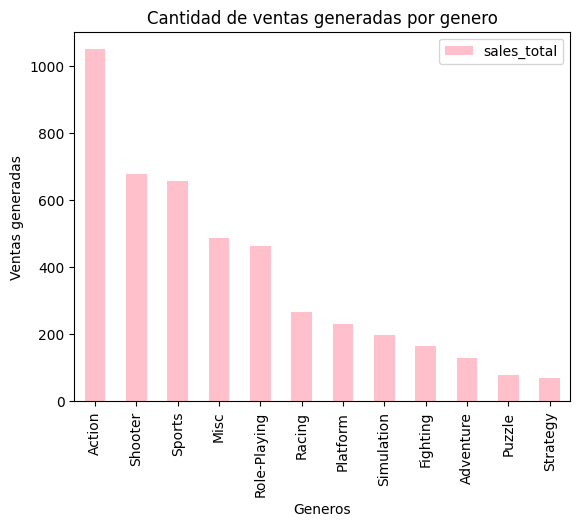

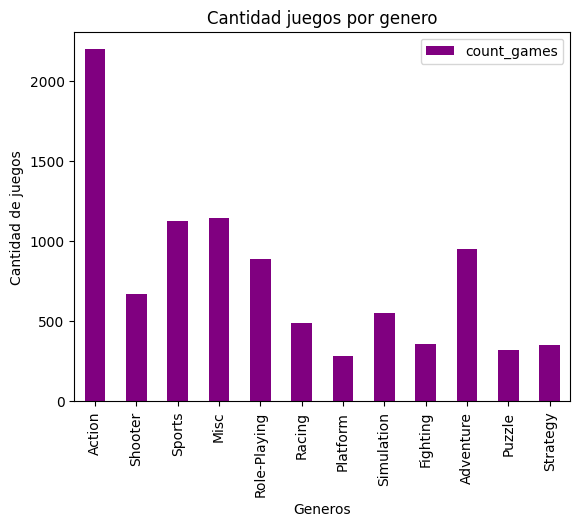

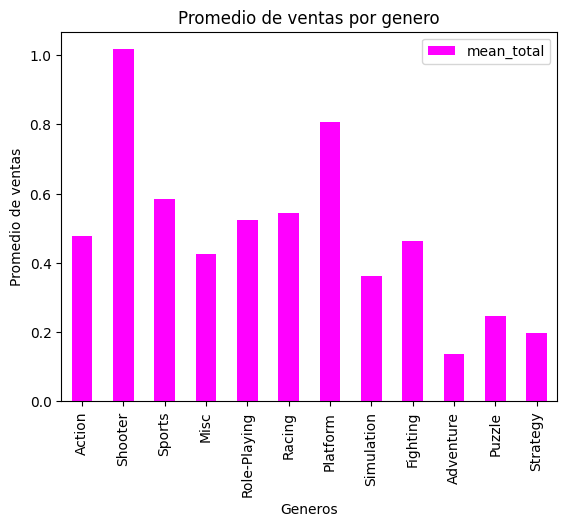

In [ ]:
#Creamos un grupo para analizar el comportamiento de la venta de juegos por genero
group_genre = filter_games.groupby(['genre'])
group_genre = group_genre.agg(count_games=('name','count'),
                                sales_total=('total_sales','sum'),
                                mean_total=('total_sales','mean'))
group_genre = group_genre.reset_index()
group_genre = group_genre.sort_values(by='sales_total',ascending=False)
group_genre.plot(kind='bar', 
                x ='genre', 
                y='sales_total', 
                color='pink', 
                title='Cantidad de ventas generadas por genero',
                xlabel = 'Generos',
                ylabel = 'Ventas generadas'
               )
plt.show()

group_genre.plot(kind='bar', 
                x ='genre', 
                y='count_games', 
                color='purple', 
                title='Cantidad juegos por genero',
                xlabel = 'Generos',
                ylabel = 'Cantidad de juegos'
               )
plt.show()
group_genre.plot(kind='bar', 
                x ='genre', 
                y='mean_total', 
                color='magenta', 
                title='Promedio de ventas por genero',
                xlabel = 'Generos',
                ylabel = 'Promedio de ventas'
               )
plt.show()

<h5><b>Observaciones: </b></h5>
Analizando el comportamiento de las ventas por género, observamos que el género 'Action' destaca claramente sobre los demás en términos de ventas totales, seguido por 'Shooter' y 'Sports'. A primera vista, podríamos considerar estos géneros como los más rentables.

Sin embargo, al analizar también la cantidad de juegos lanzados por género, notamos que 'Action' es el género con más títulos disponibles, lo que podría explicar sus altas ventas totales. En cambio, 'Shooter' no cuenta con tantos lanzamientos, pero sus ventas son igualmente muy altas, lo que lo convierte en un género especialmente rentable por juego.

Al observar el promedio de ventas por juego, confirmamos que 'Shooter' es el género más rentable, ya que genera mayores ingresos con una menor cantidad de títulos.

<h3><b>Perfil de usuario para cada región</b></h3>

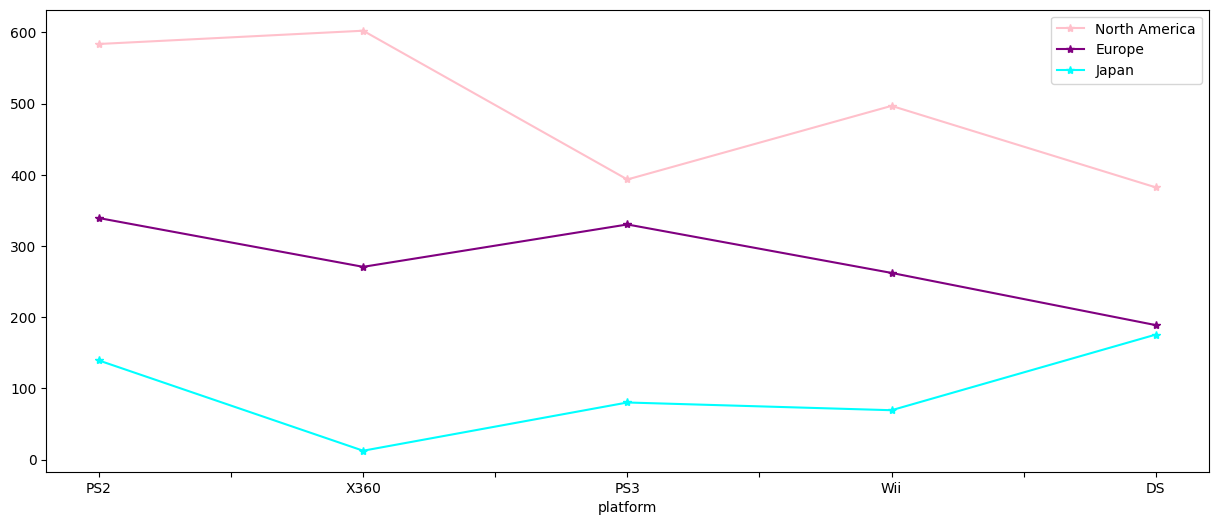

In [ ]:
games_data.sample(10)
#Revisamos las ventas por plataforma para cada región
group_platform = games_data.groupby(['platform'])
group_platform = group_platform.agg(count_games=('name','count'),
                                    na_sales=('na_sales','sum'),
                                    eu_sales=('eu_sales','sum'),
                                    jp_sales=('jp_sales','sum'),
                                    sales_total=('total_sales','sum')
                                   )
group_platform = group_platform.reset_index()
group_platform = group_platform.sort_values(by='sales_total',ascending=False).head()
group_platform
group_platform.plot(kind='line',
                    x='platform',
                    y=['na_sales','eu_sales','jp_sales'],
                    color=['pink','purple','cyan'],
                    style='*-',
                    figsize=[15,6]
                   )
plt.legend(['North America','Europe','Japan'])
plt.show()

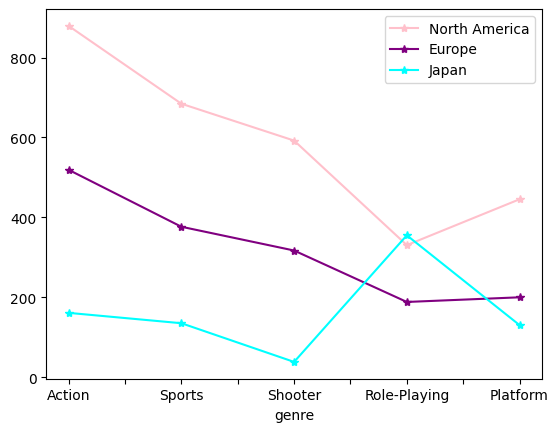

In [ ]:
#Revisamos las ventas por genero para cada región
group_genre = games_data.groupby(['genre'])
group_genre = group_genre.agg(count_games=('name','count'),
                                    na_sales=('na_sales','sum'),
                                    eu_sales=('eu_sales','sum'),
                                    jp_sales=('jp_sales','sum'),
                                    sales_total=('total_sales','sum')
                                   )
group_genre = group_genre.reset_index()
group_genre = group_genre.sort_values(by='sales_total',ascending=False).head()
group_genre
group_genre.plot(kind='line',
                    x='genre',
                    y=['na_sales','eu_sales','jp_sales'],
                    color=['pink','purple','cyan'],
                    style='*-'
                )
plt.legend(['North America','Europe','Japan'])
plt.show()

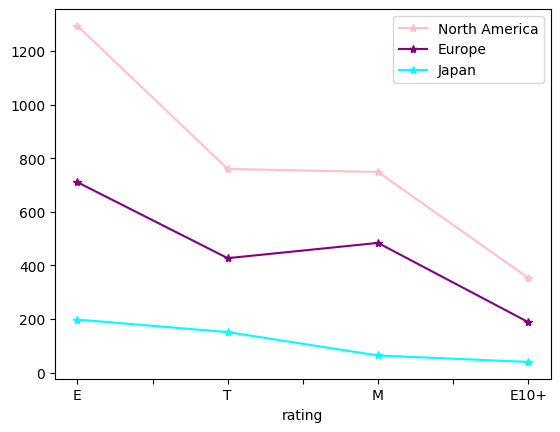

In [ ]:
#Revisamos las ventas por genero para cada región
group_rating = games_data.groupby(['rating'])
group_rating = group_rating.agg(count_games=('name','count'),
                                    na_sales=('na_sales','sum'),
                                    eu_sales=('eu_sales','sum'),
                                    jp_sales=('jp_sales','sum'),
                                    sales_total=('total_sales','sum')
                                   )
group_rating = group_rating.reset_index()
group_rating = group_rating.sort_values(by='sales_total',ascending=False).head()
group_rating = group_rating[group_rating['rating'] != 'Unknown']
group_rating.plot(kind='line',
                    x='rating',
                    y=['na_sales','eu_sales','jp_sales'],
                    color=['pink','purple','cyan'],
                    style='*-'
                )
plt.legend(['North America','Europe','Japan'])
plt.show()

<h5><b>Observaciones sobre el comportamiento de las ventas por regiones (NA, EU, JP):</b></h5>

Al analizar el comportamiento de las ventas por plataforma en las distintas regiones, podemos observar que Norteamérica lidera en ventas, seguida por Europa y finalmente Japón. Sin embargo, la plataforma más vendida varía según la región: en NA domina el X360, en Europa las consolas PlayStation (PS) y en Japón el Nintendo DS.

En cuanto a las ventas por género, también se presentan diferencias importantes según la región. En Norteamérica y Europa el género más popular es 'Action', mientras que en Japón el género con mayores ventas es 'Role-playing'. Este último resulta especialmente interesante, ya que en NA y EU es precisamente uno de los géneros con menores ventas.

Respecto a la clasificación por edad, se observa que en NA la categoría 'E' (Everyone) genera la mayor cantidad de ingresos con diferencia clara. En Europa también lidera la categoría 'E', aunque con una diferencia menos marcada. En el caso de Japón, las ventas por clasificación son mucho más equilibradas, aunque la categoría 'E' también sobresale ligeramente.

<h3><b>Hipótesis 1</b></h3>

<h5>H₀ (nula):</h5> Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.
<h5>H₁ (alternativa):</h5> Las calificaciones promedio son diferentes.


In [ ]:
# Prueba las hipótesis
# Traemos las calificaciones de los usuario promedio por plataforma

#Calificaciones  Xbox One
mean_xbox = games_data[(games_data['platform'] == 'XOne') & (games_data['user_score'] > 0)]['user_score']
#Calificaciones  PC
mean_pc = games_data[(games_data['platform'] == 'PC') & (games_data['user_score'] > 0)]['user_score']

#*********************** Confirmamos la igualdad de las varianzas
levene_result = st.levene(mean_xbox,mean_pc)
levene_result
print("Estadístico de Levene:", levene_result.statistic)
print("Valor p:", levene_result.pvalue,'\n')

if (levene_result.pvalue < 0.05):
    print('Se rechaza la hipótesis nula de igualdad de varianzas. ')
else:
    print("No podemos rechazar la hipótesis nula de igualdad de varianzas")

alpha = 0.05 #
#Las varianzas no son diferentes es por ello que afirmamos que el dato correcto es True
equal_var_bool = True 

results = st.ttest_ind(mean_xbox,mean_pc,equal_var = equal_var_bool)

print('valor p:', results.pvalue)

if (results.pvalue < alpha):
    print('Rechazamos la hipótesis nula')
else:
    print("No podemos rechazar la hipótesis nula")


Estadístico de Levene: 1.2212506384014863
Valor p: 0.2693951512047048 

No podemos rechazar la hipótesis nula de igualdad de varianzas
valor p: 1.3896435533548819e-05
Rechazamos la hipótesis nula


<h5><b>Observaciones:</b></h5>
<h5>H₀ (nula):</h5> Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.
<h5>H₁ (alternativa):</h5> Las calificaciones promedio son diferentes.
<h5>Prueba aplicada:</h5>
Para comprobar esta hipótesis, aplicamos una prueba de igualdad de medias entre dos poblaciones. Antes de realizar la prueba, evaluamos si las varianzas de ambas plataformas podían considerarse iguales utilizando la prueba de Levene. Esto nos permitió definir si usar una prueba con varianzas iguales o desiguales.
<h5>Resultado:</h5>
El resultado del análisis fue un valor p de 1.39e-05, por lo tanto, rechazamos la hipótesis nula. Esto indica que las calificaciones promedio de los usuarios en Xbox One y PC son significativamente diferentes.

<h3><b>Hipótesis 2</b></h3>

<h5>H₀ (nula):</h5> Las calificaciones promedio de los usuarios para el género Acción son mayores o iguales a las del género Deportes.
<h5>H₁ (alternativa):</h5> Las calificaciones promedio de los usuarios para el género Acción son menores a las del género Deportes.

In [ ]:
# Prueba las hipótesis
# Traemos las calificaciones de los usuario promedio por plataforma

#Calificaciones Action
mean_action = games_data[(games_data['genre'] == 'Action') & (games_data['user_score'] > 0)]['user_score']
#Calificaciones Sports
mean_sports = games_data[(games_data['genre'] == 'Sports') & (games_data['user_score'] > 0)]['user_score']

alpha = 0.05 #

results = st.ttest_ind(mean_action,mean_sports,equal_var = False)

print('valor p:', results.pvalue/2)

if (results.pvalue/2 < alpha):
    print('Rechazamos la hipótesis nula')
else:
    print("No podemos rechazar la hipótesis nula")


valor p: 0.05741909395749143
No podemos rechazar la hipótesis nula


<h5><b>Observaciones:</b></h5>

<h5>H₀ (nula):</h5> Las calificaciones promedio de los usuarios para el género Acción son mayores o iguales a las del género Deportes.
<h5>H₁ (alternativa):</h5> Las calificaciones promedio de los usuarios para el género Acción son menores a las del género Deportes.
<h5>Prueba aplicada:</h5>
Para validar nuestra hipótesis, utilizamos una prueba de comparación de medias para dos poblaciones. Dado que nuestra hipótesis es direccional, aplicamos una prueba de una cola.
<h5>Resultado:</h5>
El resultado fue un valor p de 0.0574, lo cual no es suficientemente bajo para rechazar la hipótesis nula con un nivel de significancia común (por ejemplo, α = 0.05).
Por lo tanto, no podemos rechazar la hipótesis nula, lo que indica que no hay evidencia suficiente para afirmar que el promedio de calificaciones del género Acción sea menor al del género Deportes. Más bien, los datos respaldan que el género Acción tiene una calificación promedio igual o incluso mayor.

<h3><b>Conclusión general</b></h3>

En base a cada prueba y resultado obtenido a lo largo del análisis podemos obtener lo siguiente:

Primero, vimos que tanto las ventas como el número de juegos lanzados crecieron durante varios años, alcanzando su punto más alto entre 2008 y 2009. Después de ese pico, comenzaron a disminuir, lo que muestra un ciclo natural en el mercado.

Al revisar las principales plataformas (como PS2, X360, PS3, Wii y DS), notamos que todas siguen un patrón similar: sus ventas aumentan tras el lanzamiento, alcanzan un máximo y luego bajan hasta dejar de ser relevantes. Esto sugiere que cada consola tiene un tiempo de vida útil de entre 7 y 9 años.

También observamos que no hay grandes diferencias entre plataformas en cuanto a ventas promedio por juego, y que las buenas calificaciones, tanto de usuarios como de críticos, influyen positivamente en las ventas, como se vio en el caso de PS3.

Al analizar juegos lanzados en varias plataformas, notamos que las ventas cambian según la consola, posiblemente por la diferencia en años de lanzamiento o por el nivel tecnológico de cada una. La consola X360 mostró tener un comportamiento de ventas más estable entre los juegos estudiados.

En cuanto a los géneros, ‘Action’ fue el más vendido en total, pero esto se debe a que es el género con más juegos. El género ‘Shooter’, en cambio, tiene menos títulos pero muy buenas ventas, lo que lo convierte en el más rentable por juego.

Las ventas también cambian según la región. Norteamérica lidera en ventas, seguida por Europa y Japón. Sin embargo, los gustos varían: en NA y EU prefieren ‘Action’, mientras que en Japón destacan los juegos de ‘Role-playing’. La clasificación ‘E’ (para todos) es la más vendida en todas las regiones.

Por último, al comparar las calificaciones promedio entre plataformas y géneros usando pruebas estadísticas, encontramos que:

- Las calificaciones entre Xbox One y PC son diferentes.

- No hay suficiente evidencia para decir que el género Deportes tenga mejores calificaciones que Acción.

En resumen, los resultados muestran que las ventas y preferencias de los videojuegos están influenciadas por el tipo de plataforma, la región, el género del juego y las calificaciones recibidas. Estos factores pueden ayudar a tomar decisiones para años posteriores o estrategias comerciales.

